
## DSTA

### Chapter III - The Internet Network

#### This __exercise__ notebook is taken from the Python 2 notebook for Ch. 3 of Caldarelli-Cheesa's textbook (CC).


In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Network from SVG with the best node positioning

In [4]:
import networkx as nx

from bs4 import BeautifulSoup

In [5]:

def Graph_from_SVG(stream):

    G = nx.Graph()

    attrs = {
        "line" :  ["x1", "y1", "x2", "y2"]
    }

    op = open(stream, "r")

    xml = op.read()

    soup = BeautifulSoup(xml)

    count=0
    node_diz={}
    pos={}
    for attr in attrs.keys():
        tmps = soup.findAll(attr)
        for t in tmps:
            node1=(t['x1'],t['y1'])
            node2=(t['x2'],t['y2'])
            if not node1 in node_diz:
                node_diz[node1]=str(count)
                pos[str(count)]=(float(node1[0]),float(node1[1]))
                count+=1
            if not node2 in node_diz:
                node_diz[node2]=str(count)
                pos[str(count)]=(float(node2[0]),float(node2[1]))
                count+=1
            G.add_edge(node_diz[node1],node_diz[node2])

    #save the graph in an edge list format
    nx.write_edgelist(G, "./test_graph.dat", data = False)

    return G, pos



### Plotting the test Networks

/home/shanice/miniconda3/envs/dsta/lib/python3.11/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


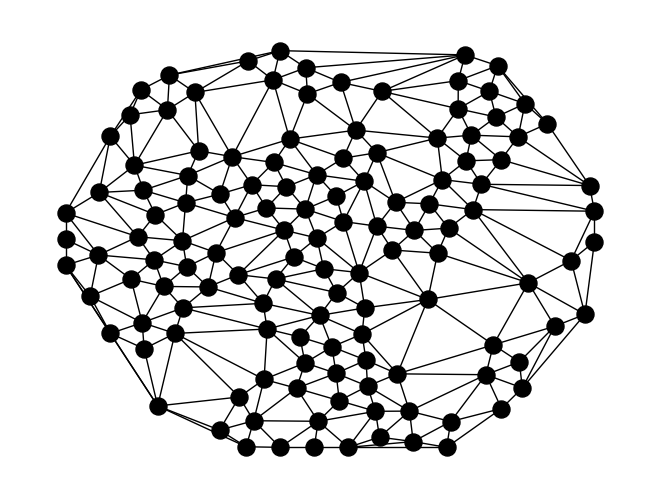

In [7]:
# getting the network in the SVG format
# NOTICE how the SVG file sits inside the imgs folder
FILE = "./imgs/test_graph.svg"



(G, pos) = Graph_from_SVG(FILE)

#plot the optimal node distribution
nx.draw(G, pos, node_size = 150, node_color='black')

#save the graph on a figure file
#savefig("./data/test_network_best.png", dpi=200)


## Degree Centrality

In [8]:
degree_centrality=nx.degree(G)
print (degree_centrality)

[('0', 5), ('1', 4), ('2', 7), ('3', 7), ('4', 5), ('5', 5), ('6', 7), ('7', 5), ('8', 7), ('9', 6), ('10', 6), ('11', 6), ('12', 6), ('13', 5), ('14', 7), ('15', 5), ('16', 3), ('17', 6), ('18', 5), ('19', 6), ('20', 7), ('21', 6), ('22', 4), ('23', 4), ('24', 7), ('25', 6), ('26', 4), ('27', 7), ('28', 6), ('29', 6), ('30', 6), ('31', 8), ('32', 6), ('33', 7), ('34', 6), ('35', 6), ('36', 5), ('37', 5), ('38', 4), ('39', 7), ('40', 6), ('41', 6), ('42', 7), ('43', 5), ('44', 5), ('45', 5), ('46', 6), ('47', 6), ('48', 5), ('49', 8), ('50', 5), ('51', 4), ('52', 4), ('53', 6), ('54', 6), ('55', 5), ('56', 4), ('57', 5), ('58', 5), ('59', 6), ('60', 7), ('61', 7), ('62', 4), ('63', 5), ('64', 6), ('65', 7), ('66', 7), ('67', 5), ('68', 5), ('69', 5), ('70', 7), ('71', 6), ('72', 5), ('73', 5), ('74', 3), ('75', 5), ('76', 6), ('77', 6), ('78', 6), ('79', 7), ('80', 7), ('81', 5), ('82', 6), ('83', 4), ('84', 5), ('85', 5), ('86', 5), ('87', 8), ('88', 8), ('89', 5), ('90', 6), ('91', 5

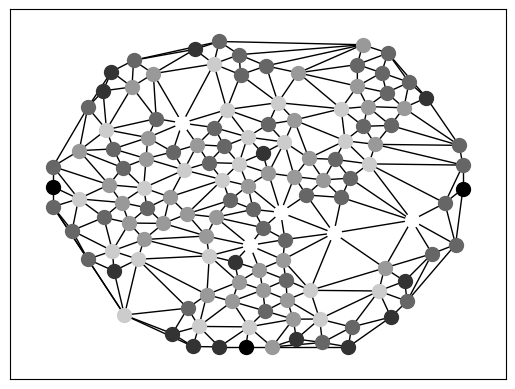

In [9]:
l=[]

res=degree_centrality

for n in G.nodes():
    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes=[n]
    color = str( (res[n]-min(l))/float((max(l)-min(l))) )
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color =
    color)

## Define a function that calculate the distance from a root node

In [10]:
def node_distance(G, root_node):
    queue=[]
    list_distances=[]
    queue.append(root_node)

    # reset the old keys
    if 'distance' in G.nodes[root_node]:
        for n in G.nodes():
            del G.nodes[n]['distance']

    G.nodes[root_node]["distance"] = 0

    # now...
    while len(queue):
        working_node=queue.pop(0)

        for n in G.neighbors(working_node):

            if len(G.nodes[n])==0:

                G.nodes[n]["distance"] = G.nodes[working_node] \
                ["distance"]+1
                queue.append(n)

    for n in G.nodes():
        list_distances.append(((root_node,n),G.nodes[n]["distance"]))

    return list_distances

## Closeness Centrality

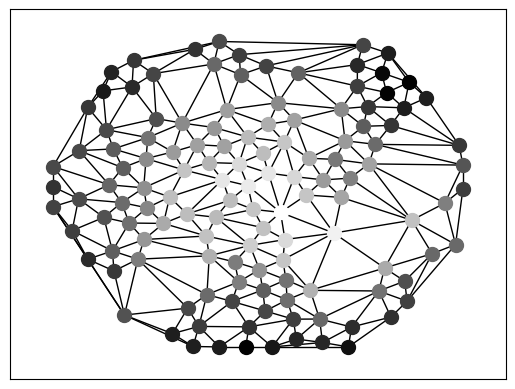

In [11]:
norm = 0.0
diz_c = {}
l_values = []

for n in G.nodes():
    l = node_distance(G,n)

    ave_length=0

    for path in l:
        ave_length += float(path[1])/(G.number_of_nodes()-1-0)

    norm+=1/ave_length

    diz_c[n] = 1/ave_length

    l_values.append(diz_c[n])

#visualization
nx.draw_networkx_edges(G, pos)
for n in G.nodes():

    list_nodes = [n]

    color = str((diz_c[n]-min(l_values))/(max(l_values)- \
                                          min(l_values)))
    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = \
                           100, node_color = color)

#savefig("./data/closeness_200.png",dpi=200)

# Q1. Given an adjacency matrix plot closeness centrality

In [12]:
import numpy as np

norm = 0.0

diz_c = {}
l_values = []
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]


## Betweenness Centrality

In [13]:
list_of_nodes = list(G.nodes())

num_of_nodes = G.number_of_nodes()

bc={} #we will need this dictionary later on

for i in range(0,num_of_nodes-1):
    for j in range(i+1,num_of_nodes):
        print(list_of_nodes[i])
        print(list_of_nodes[j])
        paths=nx.all_shortest_paths(G,source=list_of_nodes[i], \
                                    target=list_of_nodes[j])
        count = 0.0
        path_diz = {}
        for p in paths:
            #print p
            count += 1.0
            for n in p[1:-1]:
                if not n in path_diz:
                    path_diz[n] = 0.0
                path_diz[n] += 1.0

        for n in path_diz.keys():
            path_diz[n] = path_diz[n]/count

            if not n in bc:
                bc[n] = 0.0

            bc[n] += path_diz[n]

0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0
16
0
17
0
18
0
19
0
20
0
21
0
22
0
23
0
24
0
25
0
26
0
27
0
28
0
29
0
30
0
31
0
32
0
33
0
34
0
35
0
36
0
37
0
38
0
39
0
40
0
41
0
42
0
43
0
44
0
45
0
46
0
47
0
48
0
49
0
50
0
51
0
52
0
53
0
54
0
55
0
56
0
57
0
58
0
59
0
60
0
61
0
62
0
63
0
64
0
65
0
66
0
67
0
68
0
69
0
70
0
71
0
72
0
73
0
74
0
75
0
76
0
77
0
78
0
79
0
80
0
81
0
82
0
83
0
84
0
85
0
86
0
87
0
88
0
89
0
90
0
91
0
92
0
93
0
94
0
95
0
96
0
97
0
98
0
99
0
100
0
101
0
102
0
103
0
104
0
105
0
106
0
107
0
108
0
109
0
110
0
111
0
112
0
113
0
114
0
115
0
116
0
117
0
118
0
119
0
120
0
121
0
122
0
123
0
124
0
125
0
126
0
127
1
2
1
3
1
4
1
5
1
6
1
7
1
8
1
9
1
10
1
11
1
12
1
13
1
14
1
15
1
16
1
17
1
18
1
19
1
20
1
21
1
22
1
23
1
24
1
25
1
26
1
27
1
28
1
29
1
30
1
31
1
32
1
33
1
34
1
35
1
36
1
37
1
38
1
39
1
40
1
41
1
42
1
43
1
44
1
45
1
46
1
47
1
48
1
49
1
50
1
51
1
52
1
53
1
54
1
55
1
56
1
57
1
58
1
59
1
60
1
61
1
62
1
63
1
64
1
65
1
66
1
67
1
68
1
69
1
70
1
71
1
72

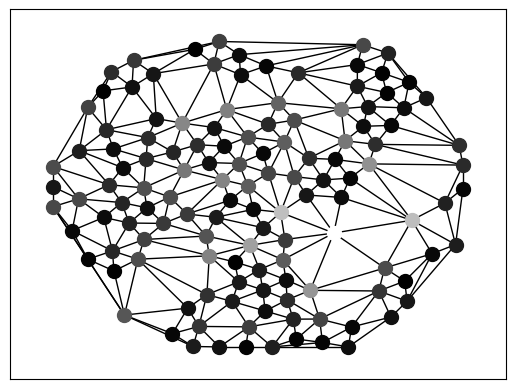

In [14]:
#visualization
l = []
res = bc

for n in G.nodes():
    if not n in res:
        res[n] = 0.0

    l.append(res[n])

nx.draw_networkx_edges(G, pos)
for n in G.nodes():
    list_nodes = [n]
    color = str( (res[n]-min(l))/(max(l)-min(l)) )

    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
                           node_color = color)

#savefig("./data/betweenness_200.png",dpi=200)

#### Eigenvector Centrality

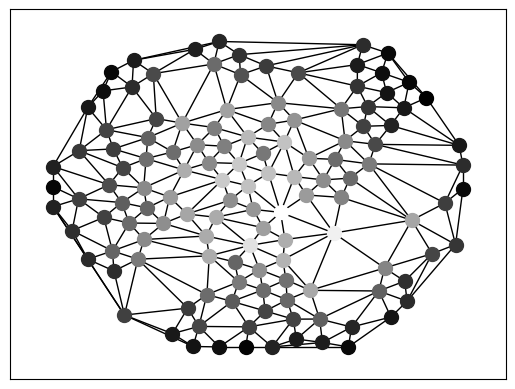

In [15]:
#networkx eigenvector centrality
centrality=nx.eigenvector_centrality_numpy(G)

#visualization
l = []
res = centrality

for n in G.nodes():
    if not n in res:
        res[n] = 0.0

    l.append(res[n])

nx.draw_networkx_edges(G, pos)

for n in G.nodes():
    list_nodes = [n]
    color = str( (res[n]-min(l))/(max(l)-min(l)) )

    nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, \
    node_color = color)

#savefig("eigenvetor_200.png",dpi=200)


## Computing the Giant Connected Component

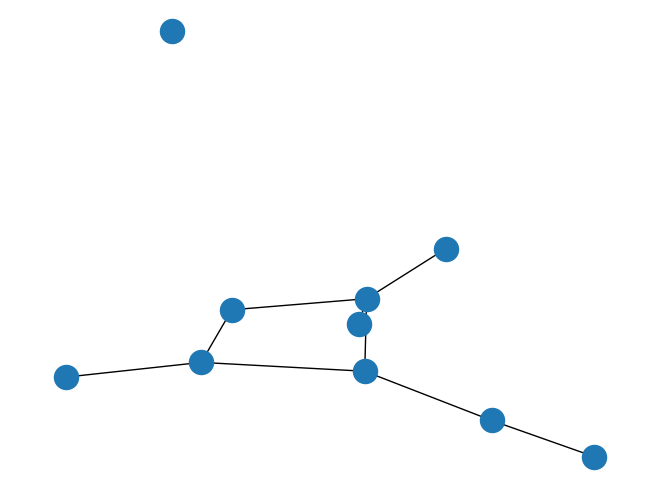

In [16]:
#Generating the test graph with two components

G_test = nx.Graph()

G_test.add_edges_from([('A','B'),('A','C'),('C','D'),('C','E'),
                       ('D','F'), ('D','H'),('D','G'),('E','G'),
                       ('E','I')])
#disconnetted node
G_test.add_node('X')

nx.draw(G_test, label=True)

#savefig("components_200.png",dpi=200)

### Giant Component through a Breadth First Search

In [17]:
def giant_component_size(G_input):

    G = G_input.copy()

    components = []
    #print(G)
    node_list = list(G.nodes())
    #print(node_list.type)

    while len(node_list) != 0:
        #print(list(node_list))
        #print(node_list[0])
        root_node=node_list[0]
        component_list = []
        component_list.append(root_node)
        queue = []

        queue.append(root_node)

        G.nodes[root_node]["visited"]=True

        while len(queue):

            working_node = queue.pop(0)

            for n in G.neighbors(working_node):

                #check if any node attribute exists
                if len(G.nodes[n])==0:
                    G.nodes[n]["visited"] = True
                    queue.append(n)
                    component_list.append(n)

        components.append((len(component_list), component_list))

        #remove the nodes of the component just discovered
        for i in component_list: node_list.remove(i)

    components.sort(reverse=True)

    GiantComponent = components[0][1]
    SizeGiantComponent = components[0][0]

    return GiantComponent,len(components)

GCC, num_components=giant_component_size(G_test)

print ("Giant Connected Component:" ,GCC)

print ("Number of components:", num_components)

Giant Connected Component: ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G', 'I']
Number of components: 2


### Q2. Use networkx built in function to calculate Giant Component and the list of edges.

### Q3. Do the same as Q2. for a given adjacency matrix.